# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e. 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e. 0, 1, ..., 9).

In [14]:
#load the required packages
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [15]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2082157
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1].

In [16]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)

#rescale the data
X, y = mnist.data.values / 255., mnist.target.values

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [17]:
#random permute the data and split into training and test taking the first 500 data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([45, 55, 52, 54, 50, 51, 47, 45, 49, 52], dtype=int64))

We now provide a function to print an image in the dataset and the corresponding true label given the index of the image in the dataset.

In [18]:
#function for plotting a digit and printing the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28, 28),
        cmap = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


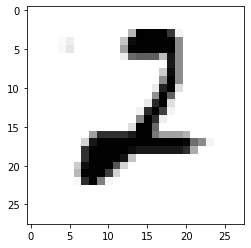

LABEL: 2
INPUT:


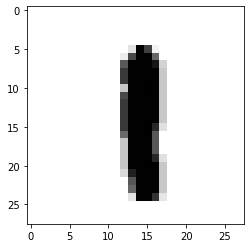

LABEL: 1


In [19]:
#let's try the plotting function
plot_digit(X_train, y_train, 100)
plot_digit(X_test, y_test, 40000)

## TO DO 1
Run SVM with 5-fold cross validation to pick the best kernel and values of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g. it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Finally, print the best parameters used as well as the score obtained by the best model.

In [20]:
#import SVC
from sklearn.svm import SVC

#import for cross-validation
from sklearn.model_selection import GridSearchCV

#parameters for linear kernel
linear_parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV and train it using all the training data
grid_search_CV_linear = GridSearchCV(linear_SVM, linear_parameters, cv=5, return_train_score=False)

#fit the grid search with training data
grid_search_CV_linear.fit(X_train, y_train)

#best SVM model: linear kernel
best_linear_SVM = grid_search_CV_linear.best_estimator_
print("Best estimator for SVM linear kernel: "+str(best_linear_SVM))

print('\nRESULTS FOR LINEAR KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_linear.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_linear.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_linear.cv_results_['params']))
print("Scores: "+str(grid_search_CV_linear.cv_results_['mean_test_score']))

#parameters for poly with degree 2 kernel
poly2_parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly', degree=2)

#DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV and train it using all the training data
grid_search_CV_poly = GridSearchCV(poly2_SVM, poly2_parameters, cv=5, return_train_score=False)

#fit grid search with training data
grid_search_CV_poly.fit(X_train, y_train)

#best SVM model: poly-2 kernel
best_poly2_SVM = grid_search_CV_poly.best_estimator_
print("\nBest estimator for SVM poly-2 kernel: "+str(best_poly2_SVM))

print('\nRESULTS FOR POLY DEGREE=2 KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_poly.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_poly.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_poly.cv_results_['params']))
print("Scores: "+str(grid_search_CV_poly.cv_results_['mean_test_score']))

#parameters for rbf kernel
rbf_parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

#DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV and train it using all the training data
grid_search_CV_rbf = GridSearchCV(rbf_SVM, rbf_parameters, cv=5, return_train_score=False)

#fit grid search with training data
grid_search_CV_rbf.fit(X_train, y_train)

#best SVM model: rbf kernel
best_rbf_SVM = grid_search_CV_rbf.best_estimator_
print("\nBest estimator for SVM rbf kernel: "+str(best_rbf_SVM))

print('\nRESULTS FOR rbf KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_rbf.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_rbf.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_rbf.cv_results_['params']))
print("Scores: "+str(grid_search_CV_rbf.cv_results_['mean_test_score']))

Best estimator for SVM linear kernel: SVC(C=1, kernel='linear')

RESULTS FOR LINEAR KERNEL:

Best parameters set found:
{'C': 1}

Score with best parameters:
0.842

All scores on the grid:
Parameters: [{'C': 1}, {'C': 10}, {'C': 100}]
Scores: [0.842 0.842 0.842]

Best estimator for SVM poly-2 kernel: SVC(C=10, degree=2, gamma=0.01, kernel='poly')

RESULTS FOR POLY DEGREE=2 KERNEL:

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.8540000000000001

All scores on the grid:
Parameters: [{'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1.0}, {'C': 10, 'gamma': 0.01}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1.0}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1.0}]
Scores: [0.832 0.852 0.852 0.854 0.852 0.852 0.852 0.852 0.852]

Best estimator for SVM rbf kernel: SVC(C=10, gamma=0.01)

RESULTS FOR rbf KERNEL:

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.8800000000000001



## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [21]:
#get training and test error for the best SVM model from CV

#as 'best' SVM model, I consider the one with the highest score from the previous results:
#SVM rbf kernel with parameters: C=10, gamma=0.01
best_SVM = grid_search_CV_rbf.best_estimator_

#fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error_best_SVM = 1. - best_SVM.score(X_train, y_train)
test_error_best_SVM = 1. - best_SVM.score(X_test, y_test)

print("Best SVM training error: %f" % training_error_best_SVM)
print("Best SVM test error: %f" % test_error_best_SVM)

Best SVM training error: 0.000000
Best SVM test error: 0.099007


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameters. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...).

Note: during training you may receive a "ConvergenceWarning" that indicates that the logistic regression solver did not converge to the optimal result. Given the scope of the notebook, we can ignore such warning but in real-world scenarios you should take corrective measures such as increasing the number of training iterations and/or the runtime for training or picking a different optimizer.

In [22]:
from sklearn import linear_model
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

#simple filter to ignore ConvergenceWarning (introduced only for 'printing' purposes)
simplefilter("ignore", category=ConvergenceWarning)

#logistic regression model from sklearn.linear_model
log_regression = linear_model.LogisticRegression()

#fit the logistic regression model on the training data
log_regression.fit(X_train, y_train)

#compute training and test error for model above
training_error_log_regression = 1. - log_regression.score(X_train, y_train)
test_error_log_regression = 1. - log_regression.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_log_regression)
print("Best logistic regression test error: %f" % test_error_log_regression)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
#use 5-fold CV to find the best choice of the parameter, than train the model on the entire training set
log_regression_cv = linear_model.LogisticRegressionCV(cv=5, random_state=ID).fit(X_train, y_train)
training_error_log_regression_cv = 1. - log_regression_cv.score(X_train, y_train)
test_error_log_regression_cv = 1. - log_regression_cv.score(X_test, y_test)

print("\nBest logistic regression training error with CV: %f" % training_error_log_regression_cv)
print("Best logistic regression test error with CV: %f" % test_error_log_regression_cv)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.147094

Best logistic regression training error with CV: 0.002000
Best logistic regression test error with CV: 0.147482


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

**ANSWER [David Polzoni]:** The following code block shows the performances (in terms of training error and test error) of the different SVM models with linear, poly-2 and rbf kernels. The result shown below is further confirmation of the correct choice of the *best_SVM* as SVM with rbf kernel and parameters $C=10$, $γ=0.01$. As for logistic regression, similar performances are obtained between *log_regression* and *log_regression_cv*, as can be seen below. Comparing *best_SVM* and logistic regression models performances, better results in terms of test error are obtained by *best_SVM*.

In [23]:
#comparison between performances of different SVM: linear, poly-2, rbf kernel

#SVM: linear kernel --> best_linear_SVM (defined above)
training_error_best_linear_SVM = 1. - best_linear_SVM.score(X_train, y_train)
test_error_best_linear_SVM = 1. - best_linear_SVM.score(X_test, y_test)
print("Best SVM linear kernel training error: %f" % training_error_best_linear_SVM)
print("Best SVM linear kernel test error: %f" % test_error_best_linear_SVM)

#SVM: poly-2 kernel --> best_poly2_SVM (defined above)
training_error_best_poly2_SVM = 1. - best_poly2_SVM.score(X_train, y_train)
test_error_best_poly2_SVM = 1. - best_poly2_SVM.score(X_test, y_test)
print("\nBest SVM poly-2 kernel training error: %f" % training_error_best_poly2_SVM)
print("Best SVM poly-2 kernel test error: %f" % test_error_best_poly2_SVM)

#SVM: rbf kernel --> best_rbf_SVM (defined above) = best_SVM, as it has the highest score
print("\nBest SVM (rbf kernel) training error: %f" % training_error_best_SVM)
print("Best SVM (rbf kernel) test error: %f" % test_error_best_SVM)

#comparison between performances: log_regression and log_regression_cv

#logistic regression
print("\nBest logistic regression training error: %f" % training_error_log_regression)
print("Best logistic regression test error: %f" % test_error_log_regression)

#logistic regression with cross-validation
print("\nBest logistic regression training error with CV: %f" % training_error_log_regression_cv)
print("Best logistic regression test error with CV: %f" % test_error_log_regression_cv)

Best SVM linear kernel training error: 0.000000
Best SVM linear kernel test error: 0.130014

Best SVM poly-2 kernel training error: 0.000000
Best SVM poly-2 kernel test error: 0.116820

Best SVM (rbf kernel) training error: 0.000000
Best SVM (rbf kernel) test error: 0.099007

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.147094

Best logistic regression training error with CV: 0.002000
Best logistic regression test error with CV: 0.147482


## TO DO 5
Write the code that finds and plots a digit that is misclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

The following digit is correctly classified by the 'best' SVM and misclassified by logistic regression with CV
INPUT:


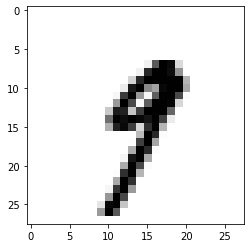

LABEL: 9


In [24]:
import random

#to find the digits which are misclassified by log_regression_cv:
#use np.where() to check for predictions which are NOT equal to the labels previously defined
misclassified_log_reg_cv = np.where(y_test != log_regression_cv.predict(X_test))

#to find the digits which are correctly classified by best_SVM:
#use np.where() to check for predictions which are equal to the labels previously defined
classified_best_SVM = np.where(y_test == best_SVM.predict(X_test))

#to find the digits which respect the conditions imposed on TO DO 5:
#use np.intesects1d() to get the digits indexes which are misclassified by log_regression_cv and classified by best_SVM
correct_digits = np.intersect1d(misclassified_log_reg_cv, classified_best_SVM)

#randomly choose an index in correct_digits defined above
rnd_selected_digit = random.choice(correct_digits)

#control to test if the chosen digit is classified by the best_SVM and misclassified by logistic_regression_cv
#to test if all the procedure is correct: use reshape(1, -1) to compare the predictions on rnd_selected_digit with the corresponding y_test label
if y_test[rnd_selected_digit] == best_SVM.predict(X_test[rnd_selected_digit].reshape(1, -1)) and y_test[rnd_selected_digit] != log_regression_cv.predict(X_test[rnd_selected_digit].reshape(1, -1)):
  print("The following digit is correctly classified by the 'best' SVM and misclassified by logistic regression with CV")
else:
  print("Error: the following digit is not among the correct ones!")

#plot the rnd_selected_digit
plot_digit(X_test, y_test, rnd_selected_digit)

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above (but no need to copy markdown comments).

Best estimator for SVM linear kernel: SVC(C=1, kernel='linear')

RESULTS FOR LINEAR KERNEL:

Best parameters set found:
{'C': 1}

Score with best parameters:
0.8790000000000001

All scores on the grid:
Parameters: [{'C': 1}, {'C': 10}, {'C': 100}]
Scores: [0.879 0.879 0.879]

Best estimator for SVM poly-2 kernel: SVC(C=10, degree=2, gamma=0.01, kernel='poly')

RESULTS FOR POLY DEGREE=2 KERNEL:

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.899

All scores on the grid:
Parameters: [{'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1.0}, {'C': 10, 'gamma': 0.01}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1.0}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1.0}]
Scores: [0.878 0.898 0.898 0.899 0.898 0.898 0.898 0.898 0.898]

Best estimator for SVM rbf kernel: SVC(C=100, gamma=0.01)

RESULTS FOR rbf KERNEL:

Best parameters set found:
{'C': 100, 'gamma': 0.01}

Score with best parameters:
0.915

All scores 

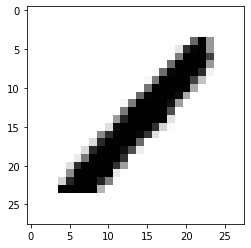

LABEL: 1


In [25]:
#split into training and test taking the first 1000 data samples as training and the rest as test
m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

#SVM: linear, poly-2 and gaussian rbf kernels (GridSearchCV)

#parameters for linear kernel
linear_parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV and train it using all the training data
grid_search_CV_linear = GridSearchCV(linear_SVM, linear_parameters, cv=5, return_train_score=False)

#fit the grid search with training data
grid_search_CV_linear.fit(X_train, y_train)

#best SVM model: linear kernel
best_linear_SVM = grid_search_CV_linear.best_estimator_
print("Best estimator for SVM linear kernel: "+str(best_linear_SVM))

print('\nRESULTS FOR LINEAR KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_linear.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_linear.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_linear.cv_results_['params']))
print("Scores: "+str(grid_search_CV_linear.cv_results_['mean_test_score']))

#parameters for poly with degree 2 kernel
poly2_parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly', degree=2)

#DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV and train it using all the training data
grid_search_CV_poly = GridSearchCV(poly2_SVM, poly2_parameters, cv=5, return_train_score=False)

#fit grid search with training data
grid_search_CV_poly.fit(X_train, y_train)

#best SVM model: poly-2 kernel
best_poly2_SVM = grid_search_CV_poly.best_estimator_
print("\nBest estimator for SVM poly-2 kernel: "+str(best_poly2_SVM))

print('\nRESULTS FOR POLY DEGREE=2 KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_poly.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_poly.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_poly.cv_results_['params']))
print("Scores: "+str(grid_search_CV_poly.cv_results_['mean_test_score']))

#parameters for rbf kernel
rbf_parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

#DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV and train it using all the training data
grid_search_CV_rbf = GridSearchCV(rbf_SVM, rbf_parameters, cv=5, return_train_score=False)

#fit grid search with training data
grid_search_CV_rbf.fit(X_train, y_train)

#best SVM model: rbf kernel
best_rbf_SVM = grid_search_CV_rbf.best_estimator_
print("\nBest estimator for SVM rbf kernel: "+str(best_rbf_SVM))

print('\nRESULTS FOR rbf KERNEL:\n')

print("Best parameters set found:")
print(grid_search_CV_rbf.best_params_)

print("\nScore with best parameters:")
print(grid_search_CV_rbf.best_score_)

print("\nAll scores on the grid:")
print("Parameters: "+str(grid_search_CV_rbf.cv_results_['params']))
print("Scores: "+str(grid_search_CV_rbf.cv_results_['mean_test_score']))

#choice of the best model in terms of best_score_ parameter 

#as 'best' SVM model, I consider the one with the highest score from the previous results:
#SVM rbf kernel with parameters: C=100, gamma=0.01 (different from above!)
best_SVM = grid_search_CV_rbf.best_estimator_

#fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error_best_SVM_1000 = 1. - best_SVM.score(X_train, y_train)
test_error_best_SVM_1000 = 1. - best_SVM.score(X_test, y_test)

print("\nBest SVM training error: %f" % training_error_best_SVM_1000)
print("Best SVM test error: %f" % test_error_best_SVM_1000)

#logistic regression analysis: optimization of hyperparameters with CV

#logistic regression model from sklearn.linear_model
log_regression = linear_model.LogisticRegression()

#fit the logistic regression model on the training data
log_regression.fit(X_train, y_train)

#compute training and test error for model above
training_error_log_regression_1000 = 1. - log_regression.score(X_train, y_train)
test_error_log_regression_1000 = 1. - log_regression.score(X_test, y_test)

print("\nBest logistic regression training error: %f" % training_error_log_regression_1000)
print("Best logistic regression test error: %f" % test_error_log_regression_1000)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
#use 5-fold CV to find the best choice of the parameter, than train the model on the entire training set
log_regression_cv = linear_model.LogisticRegressionCV(cv=5, random_state=ID).fit(X_train, y_train)
training_error_log_regression_cv_1000 = 1. - log_regression_cv.score(X_train, y_train)
test_error_log_regression_cv_1000 = 1. - log_regression_cv.score(X_test, y_test)

print("Best logistic regression training error with CV: %f" % training_error_log_regression_cv_1000)
print("Best logistic regression test error with CV: %f" % test_error_log_regression_cv_1000)

#find and plot a digit that is misclassified by logistic regression (optimized for the regularization parameter)
#and correctly classified by the 'best' SVM

#to find the digits which are misclassified by log_regression_cv:
#use np.where() to check for predictions which are NOT equal to the labels previously defined
misclassified_log_reg_cv = np.where(y_test != log_regression_cv.predict(X_test))

#to find the digits which are correctly classified by best_SVM:
#use np.where() to check for predictions which are equal to the labels previously defined
classified_best_SVM = np.where(y_test == best_SVM.predict(X_test))

#to find the digits which respect the conditions imposed on TO DO 5:
#use np.intesects1d() to get the digits indexes which are misclassified by log_regression_cv and classified by best_SVM
correct_digits = np.intersect1d(misclassified_log_reg_cv, classified_best_SVM)

#randomly choose an index in correct_digits defined above
rnd_selected_digit = random.choice(correct_digits)

#control to test if the chosen digit is classified by the best_SVM and misclassified by logistic_regression_cv
#to test if all the procedure is correct: use reshape(1, -1) to compare the predictions on rnd_selected_digit with the corresponding y_test label
if y_test[rnd_selected_digit] == best_SVM.predict(X_test[rnd_selected_digit].reshape(1, -1)) and y_test[rnd_selected_digit] != log_regression_cv.predict(X_test[rnd_selected_digit].reshape(1, -1)):
  print("\nThe following digit is correctly classified by the 'best' SVM and misclassified by logistic regression with CV")
else:
  print("\nError: the following digit is not among the correct ones!")

#plot the rnd_selected_digit
plot_digit(X_test, y_test, rnd_selected_digit)

## TO DO 7
Compare and comment on the differences with the results above.

**ANSWER [David Polzoni]**: With the increase of training samples ($m_{training}=1000$), the following advantages have been obtained, as expected:

* GridSearchCV: higher scores in terms of parameters evaluation;
* different set of parameters for the *best_SVM*;
* lower training and test error for *best_SVM*;
* lower training and test error for logistic regression model with and without CV;
* logistic regression: similar performances with and without CV;
* better performances in terms of test error for *best_SVM* w.r.t. logistic regression models.

In fact, the larger amount of training samples results in better performances for models that are trained with a larger set of training data. The results listed above are shown in the following code block.

In [26]:
#different set of parameters for best SVM: m_training = 1000
print("Best SVM (m_training = 1000): "+str(best_SVM))

#comparison between performances of best SVMs: m_training = 500 and m_training = 1000
print("\nBest SVM training error (m_training = 500): %f" % training_error_best_SVM)
print("Best SVM test error (m_training = 500): %f" % test_error_best_SVM)

print("\nBest SVM training error (m_training = 1000): %f" % training_error_best_SVM_1000)
print("Best SVM test error (m_training = 1000): %f" % test_error_best_SVM_1000)

#comparison between performances of best logistic regression models with and without CV: m_training = 500 and m_training = 1000
print("\nBest logistic regression training error (m_training = 500): %f" % training_error_log_regression)
print("Best logistic regression test error (m_training = 500): %f" % test_error_log_regression)
print("Best logistic regression training error with CV (m_training = 500): %f" % training_error_log_regression_cv)
print("Best logistic regression test error with CV (m_training = 500): %f" % test_error_log_regression_cv)

print("\nBest logistic regression training error (m_training = 1000): %f" % training_error_log_regression_1000)
print("Best logistic regression test error (m_training = 1000): %f" % test_error_log_regression_1000)
print("Best logistic regression training error with CV (m_training = 1000): %f" % training_error_log_regression_cv_1000)
print("Best logistic regression test error with CV (m_training = 1000): %f" % test_error_log_regression_cv_1000)

Best SVM (m_training = 1000): SVC(C=100, gamma=0.01)

Best SVM training error (m_training = 500): 0.000000
Best SVM test error (m_training = 500): 0.099007

Best SVM training error (m_training = 1000): 0.000000
Best SVM test error (m_training = 1000): 0.078420

Best logistic regression training error (m_training = 500): 0.000000
Best logistic regression test error (m_training = 500): 0.147094
Best logistic regression training error with CV (m_training = 500): 0.002000
Best logistic regression test error with CV (m_training = 500): 0.147482

Best logistic regression training error (m_training = 1000): 0.000000
Best logistic regression test error (m_training = 1000): 0.127696
Best logistic regression training error with CV (m_training = 1000): 0.002000
Best logistic regression test error with CV (m_training = 1000): 0.126942
